In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans, dbscan
import random
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.figure import Figure

# Descomentar no final
# import warnings
# warnings.filterwarnings('ignore')

### Metodos auxiliares

In [2]:
columns = ["ID", "ACC_X", "ACC_Y", "ACC_Z", "GYRO_X", "GYRO_Y", "GYRO_Z", "MAG_X", "MAG_Y", "MAG_Z", "TIMESTAMP", "ACT_LABEL"] 
part = "0"
dev = "1"

<h1>Import Data</h1>

In [3]:
my_data = np.genfromtxt('FORTH_TRACE_DATASET/part' + part + '/part' + part + 'dev' + dev + '.csv', delimiter=',')
data = pd.DataFrame(my_data, columns=columns)
data

,ID,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,MAG_X,MAG_Y,MAG_Z,TIMESTAMP,ACT_LABEL
0,1.0,-1.8650,9.3890,2.5812,-1.14180,-1.185600,0.849980,-0.34476,0.59839,1.01340,505.89,1.0
1,1.0,-1.7963,9.3742,2.4460,-1.56180,-0.661650,0.597300,-0.34274,0.57631,1.00000,525.42,1.0
2,1.0,-1.8696,9.3000,2.3514,-1.18770,-1.284100,0.142120,-0.34476,0.59639,1.01560,544.95,1.0
3,1.0,-1.7961,9.3624,2.4584,-0.58399,-2.033400,0.429120,-0.32863,0.62249,1.01560,564.48,1.0
4,1.0,-1.6768,9.3506,2.4685,-0.37050,-1.364700,0.371940,-0.33669,0.62048,1.02450,584.01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53115,1.0,-2.2033,9.3479,2.3327,-1.50120,-0.092005,-0.117810,0.22581,0.87751,0.53898,1037900.00,1.0
53116,1.0,-2.1798,9.3235,2.3205,-1.59020,-0.091795,-0.007825,0.21169,0.89759,0.53898,1037900.00,1.0
53117,1.0,-2.1324,9.3112,2.3076,-1.69930,-0.379580,0.132570,0.22379,0.90361,0.54343,1037900.00,1.0
53118,1.0,-2.1327,9.3110,2.2955,-1.55450,-0.241180,0.180670,0.22782,0.89558,0.55234,1038000.00,1.0


<h1>Ex 3.1</h1>

In [4]:
activities = [i + 1 for i in range(16)]
activities_labels = ["palha", "Stand", "Sit", "Sit and Talk", "Walk", "Walk and Talk", "Climb Stair", "Climb Stair and Talk", "Stand to Sit", "Sit to Stand", "Stand to Sit and Talk", "Sit to Stand and Talk", "Stand to Walk", "Walk to Stand", "Stand to Climb Stairs / Stand to Climb Stairs and Talk", "Climb Stairs to Walk", "Climb Stairs and Talk to Walk and Talk"]
sensors = ['ACC', 'GYRO', 'MAG']

In [5]:
def return_activity(data,act):
    return data[data["ACT_LABEL"]==act]

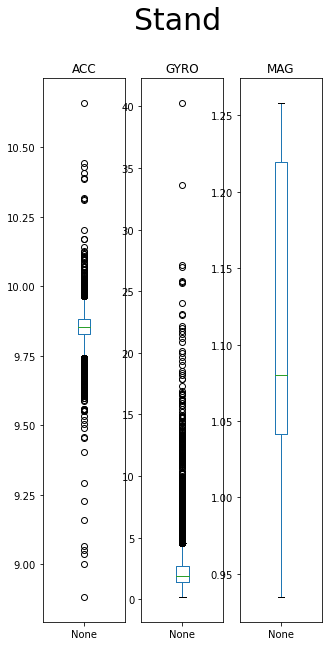

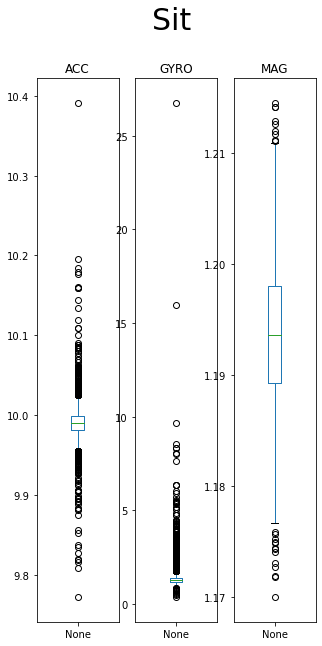

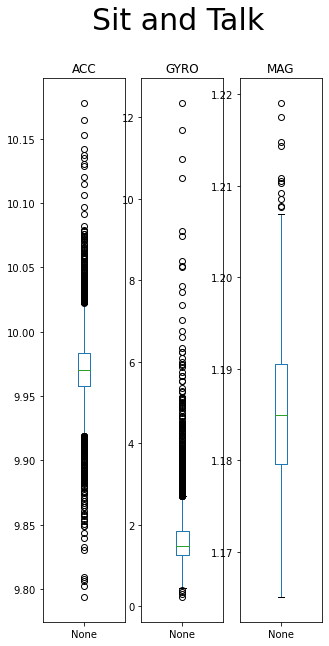

In [6]:
transformed_data = {}
max_activities_to_plot = 3
to_plot = True
contador = 0
for act in activities:
    modulo = return_activity(data,act)
    ACC_BOX_PLOT = np.sqrt(pow(modulo["ACC_X"], 2) + pow(modulo["ACC_Y"], 2) + pow(modulo["ACC_Z"], 2))
    GYRO_BOX_PLOT = np.sqrt(pow(modulo["GYRO_X"], 2) + pow(modulo["GYRO_Y"], 2) + pow(modulo["GYRO_Z"], 2))
    MAG_BOX_PLOT = np.sqrt(pow(modulo["MAG_X"], 2) + pow(modulo["MAG_Y"], 2) + pow(modulo["MAG_Z"], 2))
    frame = {'ACC': ACC_BOX_PLOT, 'GYRO': GYRO_BOX_PLOT,'MAG': MAG_BOX_PLOT}
    join_series = pd.DataFrame(frame)
    transformed_data[activities_labels[act]] = join_series
  
    if to_plot:
        fig,ax = plt.subplots(1,3)
        fig.suptitle(activities_labels[act], fontsize=30)
    
        plt.subplot(131)
        plt.title("ACC")
        ACC_BOX_PLOT.plot.box(figsize = (5,10))
       
        plt.subplot(132)
        plt.title("GYRO")
        GYRO_BOX_PLOT.plot.box(figsize = (5,10))
    
        plt.subplot(133)
        plt.title("MAG")
        MAG_BOX_PLOT.plot.box(figsize = (5,10))
    
        if contador == max_activities_to_plot - 1:
            to_plot = False
        
        contador += 1

# Ex 3.2


In [7]:
def density(data, nr, k):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    ul = k * IQR + Q3
    ll = -k * IQR + Q1
    n0 = len(data[(data > ul) | (data < ll)])
    return float(n0) / float(nr) * 100.0

In [8]:
k = 1.5
nr = len(transformed_data["Stand"]['MAG'])

density_dataFrame = pd.DataFrame(columns=["Activity", "Sensor", "Density"])
for act in activities_labels[1:]:
    for sen in sensors:
        new_row = pd.Series(data={'Activity': act, 'Sensor': sen, 'Density': density(transformed_data[act][sen], nr, k)})
        density_dataFrame = density_dataFrame.append(new_row, ignore_index=True)
        
density_dataFrame

,Activity,Sensor,Density
0,Stand,ACC,3.496186
1,Stand,GYRO,7.618961
2,Stand,MAG,0.000000
3,Sit,ACC,2.070469
4,Sit,GYRO,3.995641
5,Sit,MAG,0.199782
6,Sit and Talk,ACC,2.860516
7,Sit and Talk,GYRO,2.996731
8,Sit and Talk,MAG,0.099891
9,Walk,ACC,2.097712


### Análise da densidade
<p> Demonstramos em cima a tabela que nos mostra a densidade de 
outliers para cada atividade e sensor</p>

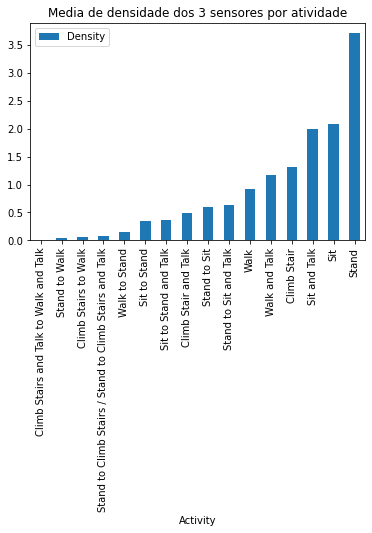

In [9]:
density_dataFrame.groupby("Activity").mean().sort_values("Density").plot(kind="bar")
plt.title("Media de densidade dos 3 sensores por atividade")
plt.show()

#### Podemos conluir que a atividade "Stand" é de longe a que tem maior densidade de outliers.
#### Por outro lado, a Climb Strairs to Walk and Talk é a que tem menos outliers

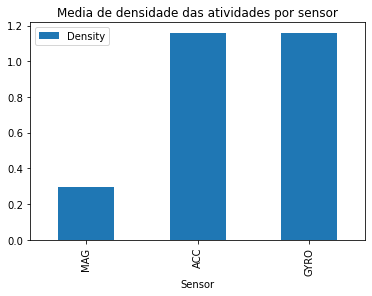

In [10]:
density_dataFrame.groupby("Sensor").mean().sort_values("Density").plot(kind="bar")
plt.title("Media de densidade das atividades por sensor")
plt.show()

#### Pelo gráfico acima concluimos que o sensor de Magnometro é que tem menor densidade de outliers em comparação com os outros 2 sensores

# Ex 3.3
## [PDC] Confirmar a função de baixo \/

In [11]:
def z_score(data,k):
    mean = data.mean()
    std = data.std()
    z_score = abs((data - mean) / std)
    return data[z_score < k], data[z_score >= k]

# Ex 3.4
## Z-Score - Visualização
## [PDC] Confirmar com os gráficos com buraco

In [12]:
def graficos_z_score(label, act, transformed_data, density_dataFrame, toPlot, k):
    normal_data, outlier = z_score(transformed_data[act][label], k)
    if toPlot:
        plt.title(act + " / " + label + " Z-Score - " + str(k))
        plt.plot(np.zeros_like(normal_data), normal_data, 'o', color="blue")
        plt.plot(np.zeros_like(outlier), outlier, 'x', color="red")
    density_dataFrame.loc[(density_dataFrame["Activity"] == act) & (density_dataFrame["Sensor"] == label), "Z-Score Density_" + str(k)] = len(outlier) / (len(outlier) + len(normal_data)) * 100

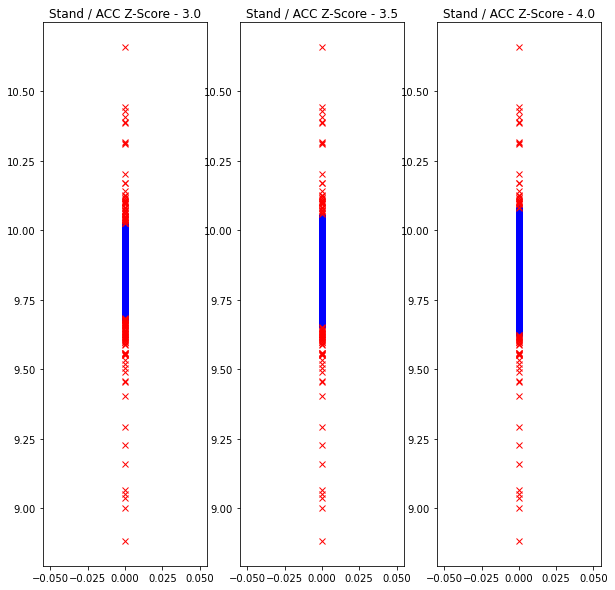

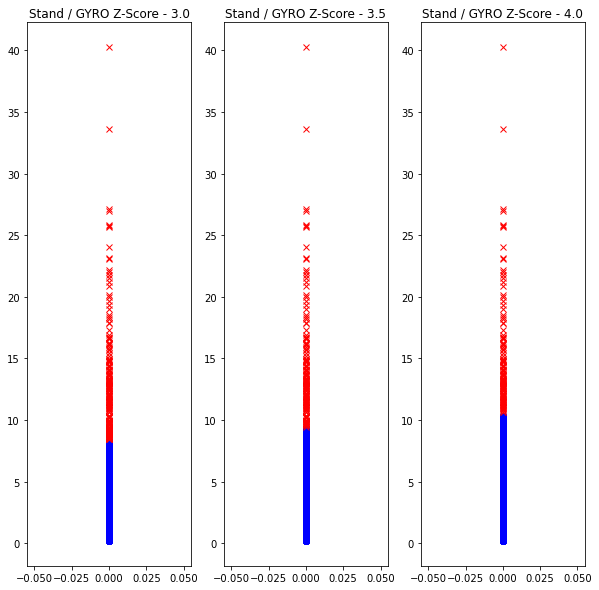

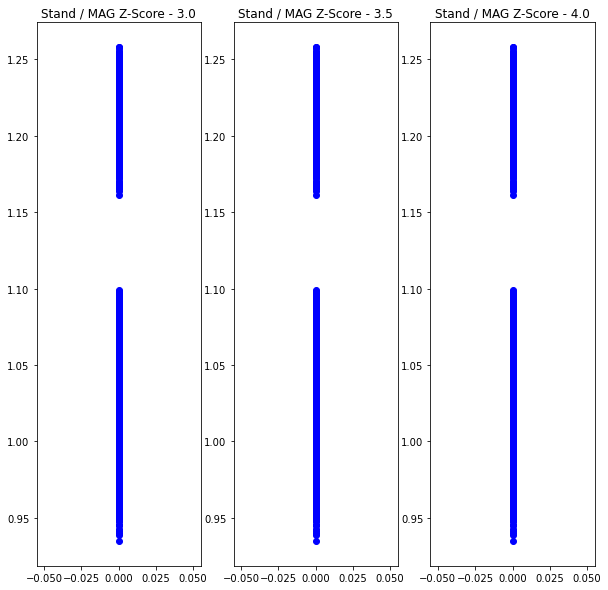

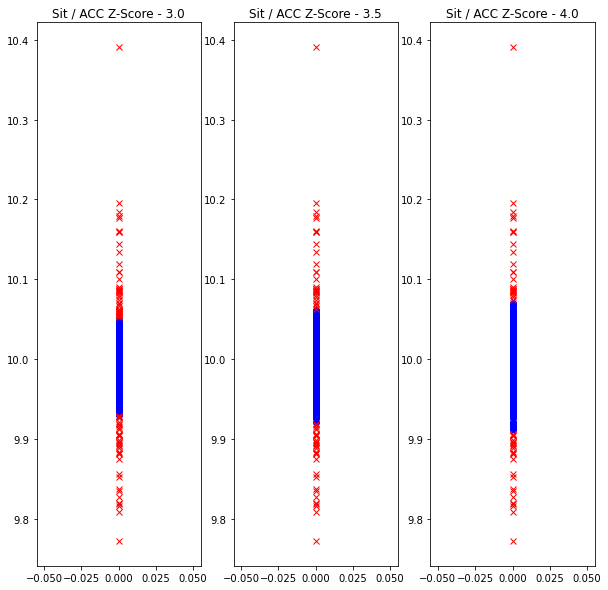

In [13]:
# %matplotlib inline

density_dataFrame.rename(columns={'Density': 'Density_Q'}, inplace=True) 
how_many_plots_times_3 = 4 
show_plot = True
i = 0
for k in np.linspace(3,4,3):
    density_dataFrame["Z-Score Density_"+str(k)] = np.nan
for act in activities_labels[1:]: 
    for sen in sensors:
       
        if i+1 > how_many_plots_times_3:
            show_plot = False
        if show_plot:
            fig,ax = plt.subplots(1,3,figsize=(10,10))       
            plt.subplot(131)    
        graficos_z_score(sen,act ,transformed_data,density_dataFrame,show_plot,3.0)
        
        if show_plot:
            plt.subplot(132)
        graficos_z_score(sen,act ,transformed_data,density_dataFrame,show_plot,3.5)
        
        if show_plot:
            plt.subplot(133)
        graficos_z_score(sen,act ,transformed_data,density_dataFrame,show_plot,4.0)
        i+=1

# Ex 3.5


#### Podemos que quanto maior o k do Z-Score, menor vai ser a densidade de outliers do sinal

## Graficos e tabelas para justificar:

In [14]:
density_dataFrame

,Activity,Sensor,Density_Q,Z-Score Density_3.0,Z-Score Density_3.5,Z-Score Density_4.0
0,Stand,ACC,3.496186,1.044315,0.744642,0.581184
1,Stand,GYRO,7.618961,1.888849,1.443879,1.162368
2,Stand,MAG,0.000000,0.000000,0.000000,0.000000
3,Sit,ACC,2.070469,1.458333,1.076389,0.920139
4,Sit,GYRO,3.995641,1.163194,0.972222,0.833333
5,Sit,MAG,0.199782,0.243056,0.034722,0.000000
6,Sit and Talk,ACC,2.860516,1.927083,1.111111,0.659722
7,Sit and Talk,GYRO,2.996731,1.649306,1.250000,0.885417
8,Sit and Talk,MAG,0.099891,0.156250,0.069444,0.034722
9,Walk,ACC,2.097712,0.715072,0.242024,0.033003


In [15]:
# Simplesmente para ajudar no x label dos plots
density_dataFrame["x_label_aux"] = density_dataFrame["Activity"] + " - " + density_dataFrame["Sensor"]

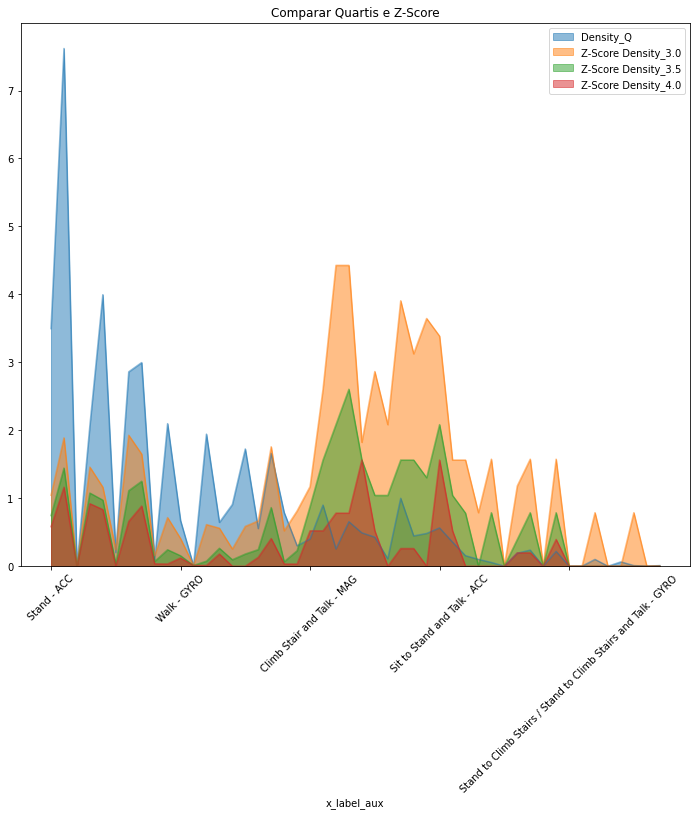

In [16]:
density_dataFrame.plot.area(figsize=(12, 10), stacked=False, x="x_label_aux")
plt.title("Comparar Quartis e Z-Score")
plt.xticks(rotation=45)
plt.show()

## Comparar os resultados do 3.1 com o 3.4
<p>Pelo que podemos confluir pela visualização dos nossos resultados no gráfico em cima e na tabela, a densidade de outliers pelos quartis é bastante superior em todos os sensores nas atividades de Stand, Sit, Sit and Talk	 ,Walk, Walk and Talk e Climb Stair. Depois nas restantes, o Z-Score de k=3 já tem maior densidade de outliers. Chegando a haver atividade como Stand to Climb Stairs / Stand to Climb Stairs em que a densidade calculada pelos quartis é inferior de todos os Z-Scores de k=3 até k=4.	</p>

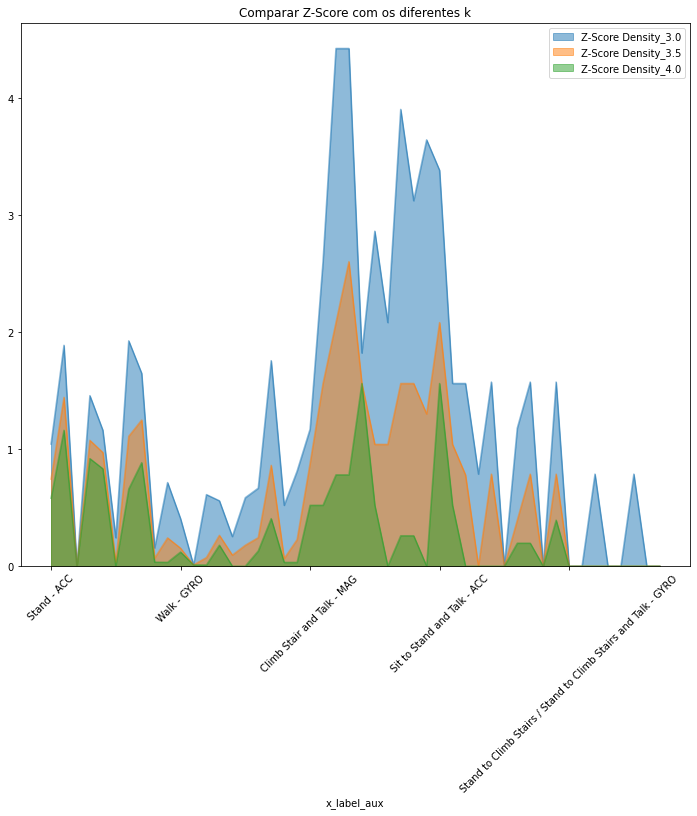

In [17]:
density_dataFrame[['x_label_aux', 'Z-Score Density_3.0', 'Z-Score Density_3.5', 'Z-Score Density_4.0']].plot.area(figsize=(12, 10), stacked=False, x="x_label_aux")
plt.title("Comparar Z-Score com os diferentes k")
plt.xticks(rotation=45)
plt.show()

## Comparar os Z-Scores entre si
<p>Pelo gráfico em cima podemos concuir o que já seria de esperar, que é: quando maior o K do Z-Score, menor a densidade de outliers. Uma vez que estamos a aumentar a distância à origem da distribuição Gaussina em que consideramos que os pontos não são ouliers, como podemos ver na imagem em baixo.</p>
<img src="z-score.png" width=600 height=600 />


# Ex 3.6

In [18]:
# Implementação feita por nós

def k_means_by_us(data, n_clusters, max_iterations, sensor):
    # Calcula a distância entre os pontos aos centros dos clusters
    def calculate_distance(data,centroids):   
        data_2_manipulate = data[data.columns[:-1]].values
        all_clusters = []
        for index,row in enumerate(data_2_manipulate):
            distance = [np.linalg.norm(row - centroid) for centroid in centroids]
            cluster = distance.index(min(distance))
            all_clusters.append(cluster)
        data["centroids"] = all_clusters            
        return data
    
    # Atualiza o centro dos clusters
    def centroids_new_positions(data, n_clusters):
        return [data[data["centroids"] == i].mean().values[:-1] for i in range(n_clusters)]
    
    # Recursividade
    def recursive_kMeans(data, n_clusters, max_iterations, curr_iteration, list_clusters):
        prev_list_clusters = list_clusters
        data = calculate_distance(data, list_clusters)
        list_clusters = centroids_new_positions(data, n_clusters)
        if str(prev_list_clusters) == str(list_clusters) or curr_iteration > max_iterations:
            return data
        return recursive_kMeans(data, n_clusters, max_iterations, curr_iteration + 1, list_clusters)
    
    # Preparar dados para o algoritmo
    data["centroids"] = -1
    clusters_start_index = random.choices(data.index, k=n_clusters)
    list_clusters = []
    for clust in clusters_start_index:
        coordinates = np.array([data.loc[clust][sensor + "_X"], data.loc[clust][sensor + "_Y"], data.loc[clust][sensor + "_Z"]])
        list_clusters.append(coordinates)
    
        
    return recursive_kMeans(data, n_clusters, max_iterations, 0, list_clusters)["centroids"]

# Ex 3.7
## [PDC] Como é que é suposto comparar os dados obtidos no 3.4, visto que o 3.4 é com o módulo e este é com X, Y, Z? E como é que se vê outliers do KMeans? (cluster mais pequeno?)

In [19]:
%matplotlib notebook

def calculate_and_show_kmeans(data, n_clusters, max_iter, act, sensor, to_plot):
    data_to_clusterise = data[data["ACT_LABEL"] == act][[sensor + "_X", sensor + "_Y", sensor + "_Z"]]
    data_to_clusterise["clusters"] = k_means_by_us(data_to_clusterise, n_clusters, max_iter, sensor)
    
    if to_plot:
        fig = plt.figure(figsize=(8, 6)).gca(projection='3d')
        plt.title(activities_labels[act] + " / " + sensor)
        if sensor == "ACC":
            fig.scatter(data_to_clusterise.ACC_X, data_to_clusterise.ACC_Y, data_to_clusterise.ACC_Z, c=data_to_clusterise.clusters)
            fig.set_xlabel('ACC_X')
            fig.set_ylabel('ACC_Y')
            fig.set_zlabel('ACC_Z')
        elif sensor == "GYRO":
            fig.scatter(data_to_clusterise.GYRO_X, data_to_clusterise.GYRO_Y, data_to_clusterise.GYRO_Z, c=data_to_clusterise.clusters)
            fig.set_xlabel('GYRO_X')
            fig.set_ylabel('GYRO_Y')
            fig.set_zlabel('GYRO_Z')
        elif sensor == "MAG":
            fig.scatter(data_to_clusterise.MAG_X, data_to_clusterise.MAG_Y, data_to_clusterise.MAG_Z, c=data_to_clusterise.clusters)
            fig.set_xlabel('MAG_X')
            fig.set_ylabel('MAG_Y')
            fig.set_zlabel('MAG_Z')
        plt.show()

In [20]:
# https://www.youtube.com/watch?v=IEBsrUQ4eMc

def calculate_distance(x, y, a, b, c):
    return abs((a * x + b * y + c)) / (np.sqrt(a * a + b * b))

$$$$ 1


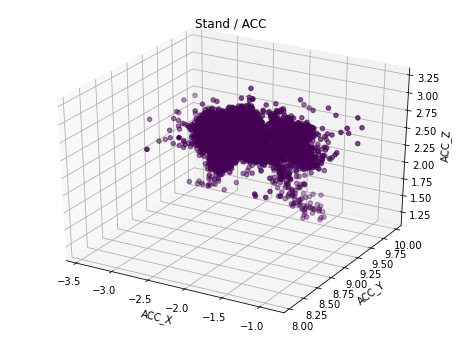

$$$$ 2


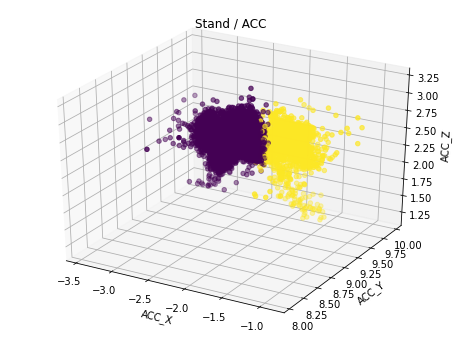

$$$$ 3


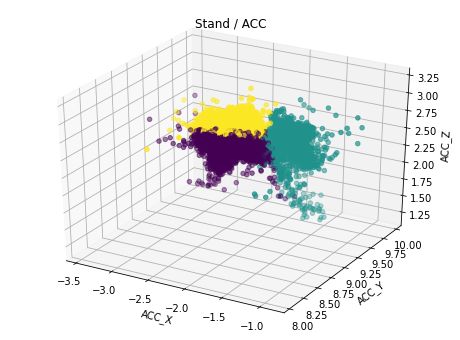

$$$$ 4


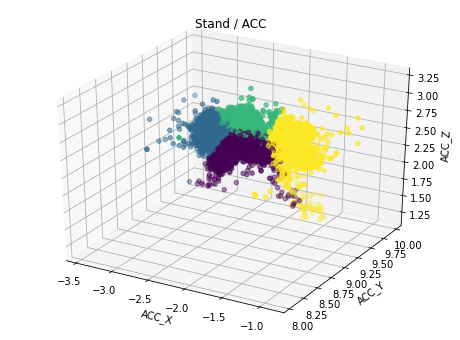

$$$$ 5


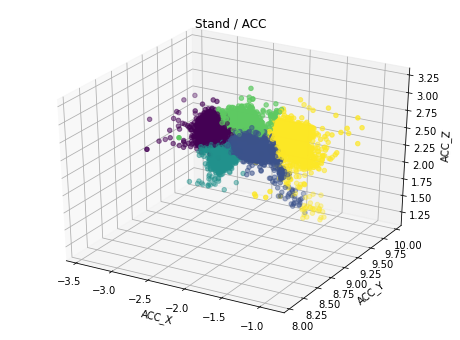

24.680674076080322


In [21]:
# Feito com o nosso kmeans
%matplotlib inline

import time

start = time.time()

n_clusters = range(1, 6)
max_iter = 100
to_plot = True
max_act_to_plot = 1
contador = 0
for act in activities:
    for n in n_clusters:
        print("$$$$", n)
        calculate_and_show_kmeans(data, n, max_iter, act, "ACC", to_plot)
    #calculate_and_show_kmeans(data, n_clusters, max_iter, act, "GYRO", to_plot)
    #calculate_and_show_kmeans(data, n_clusters, max_iter, act, "MAG", to_plot)
    if contador == max_act_to_plot - 1:
        break
    contador += 1
    
print(time.time() - start)

[KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9)]
[        ACC_X   ACC_Y   ACC_Z
0     -1.8650  9.3890  2.5812
1     -1.7963  9.3742  2.4460
2     -1.8696  9.3000  2.3514
3     -1.7961  9.3624  2.4584
4     -1.6768  9.3506  2.4685
...       ...     ...     ...
53115 -2.2033  9.3479  2.3327
53116 -2.1798  9.3235  2.3205
53117 -2.1324  9.3112  2.3076
53118 -2.1327  9.3110  2.2955
53119 -2.1334  9.2982  2.2591

[11012 rows x 3 columns]]
@@@@@ 3


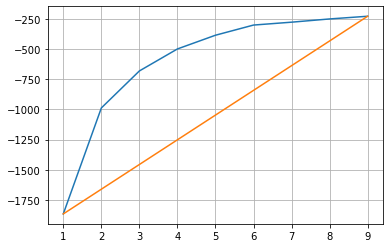

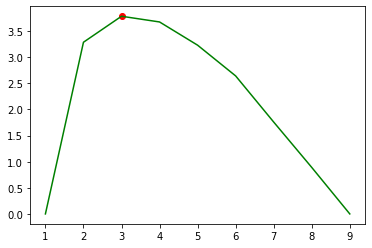

3.4588375091552734


In [22]:
%matplotlib inline

import time
start = time.time()

min_clusters = 1
max_clusters = 9
n_clusters = range(min_clusters, max_clusters + 1)

km = [KMeans(n_clusters=i) for i in n_clusters]
print(km)
data_to_clusterise = data[data["ACT_LABEL"] == 1][["ACC_X", "ACC_Y", "ACC_Z"]]
print([data_to_clusterise])
score = [km[i].fit(data_to_clusterise).score(data_to_clusterise) for i in range(len(km))]

# Reta
aux_x = [n_clusters[0], n_clusters[-1]]
aux_y = [score[0], score[-1]]

a = score[0] - score[-1]
b = n_clusters[-1] - n_clusters[0]
c1 = n_clusters[0] * score[-1]
c2 = n_clusters[-1] * score[0]
c = c1 - c2

# Valores das distancias da reta a curvinha
dists_reta = [calculate_distance(n, score[n - 1], a, b, c) for n in n_clusters]

print("@@@@@", dists_reta.index(max(dists_reta)) + 1)

plt.figure(1)
plt.plot(n_clusters, score)
plt.plot(aux_x, aux_y)
plt.grid("on")
plt.show()

plt.figure(2)
plt.plot(n_clusters, dists_reta, color="green")
plt.scatter(dists_reta.index(max(dists_reta)) + 1, max(dists_reta), color="r")
plt.show()

print(time.time() - start)

# Ex 3.7.1 - extra
# Algoritmo DBSCAN

In [23]:
def calculate_and_show_dbscan(data, eps, min_samples, sensor, act, to_plot):
    data_to_clusterise = data[data["ACT_LABEL"] == act][[sensor + "_X", sensor + "_Y", sensor + "_Z"]]
    data_to_clusterise["clusters"] = dbscan(data_to_clusterise, eps=eps, min_samples=min_samples)[1]
    
    if to_plot:
        fig = plt.figure(figsize=(8, 6)).gca(projection='3d')
        plt.title(activities_labels[act] + " / " + sensor)
        if sensor == "ACC":
            fig.scatter(data_to_clusterise.ACC_X, data_to_clusterise.ACC_Y, data_to_clusterise.ACC_Z, c=data_to_clusterise.clusters)
            fig.set_xlabel('ACC_X')
            fig.set_ylabel('ACC_Y')
            fig.set_zlabel('ACC_Z')
        elif sensor == "GYRO":
            fig.scatter(data_to_clusterise.GYRO_X, data_to_clusterise.GYRO_Y, data_to_clusterise.GYRO_Z, c=data_to_clusterise.clusters)
            fig.set_xlabel('GYRO_X')
            fig.set_ylabel('GYRO_Y')
            fig.set_zlabel('GYRO_Z')
        elif sensor == "MAG":
            fig.scatter(data_to_clusterise.MAG_X, data_to_clusterise.MAG_Y, data_to_clusterise.MAG_Z, c=data_to_clusterise.clusters)
            fig.set_xlabel('MAG_X')
            fig.set_ylabel('MAG_Y')
            fig.set_zlabel('MAG_Z')
        plt.show()

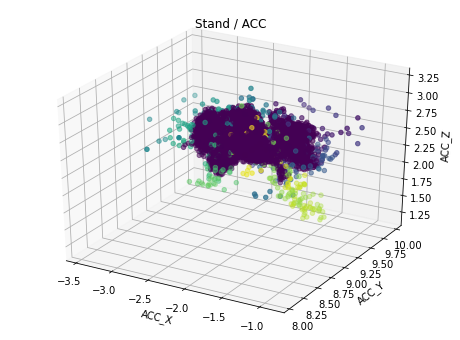

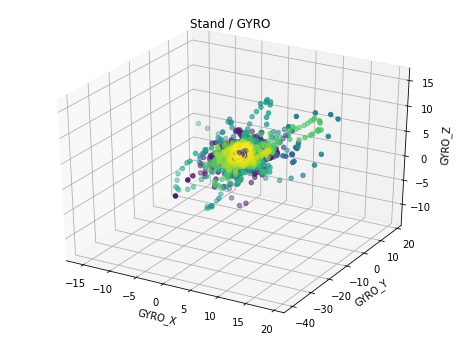

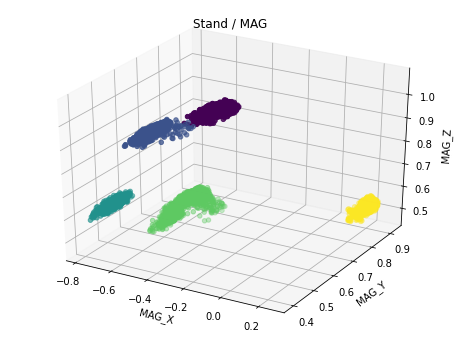

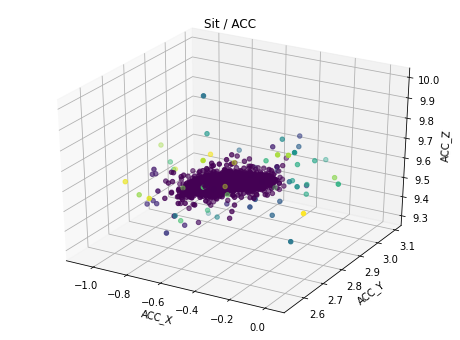

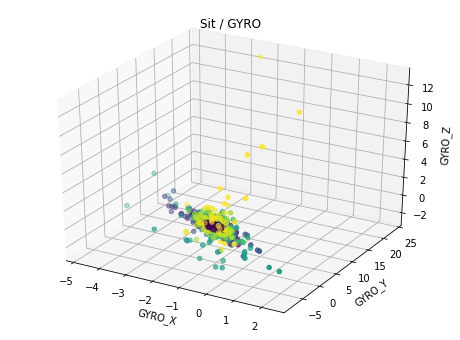

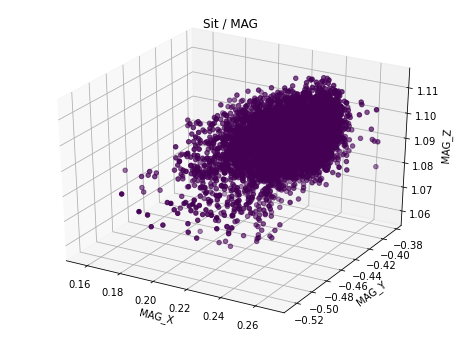

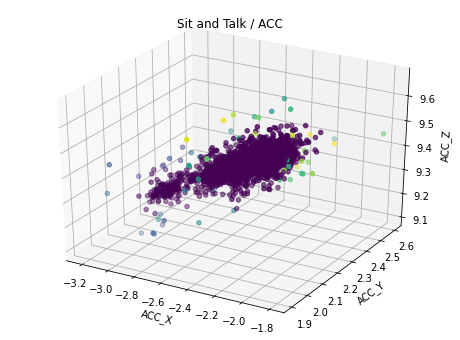

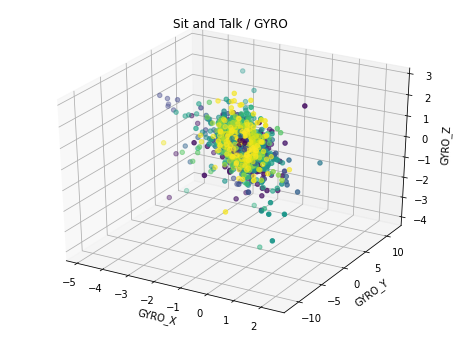

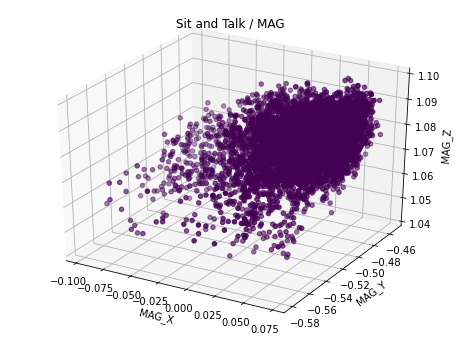

In [24]:
%matplotlib inline

upper_limits_n_clusters = 5
n_clusters = 9
eps = 0.05
min_samples = 1
to_plot = True
max_act_to_plot = 3
contador = 0
for act in activities:
    calculate_and_show_dbscan(data, eps, min_samples, "ACC", act, to_plot)
    calculate_and_show_dbscan(data, eps, min_samples, "GYRO", act, to_plot)
    calculate_and_show_dbscan(data, eps, min_samples, "MAG", act, to_plot)
    if contador == max_act_to_plot - 1:
        to_plot = False
    contador += 1

# Ex 3.8
## Injetar outliers

In [25]:
def calculate_density_z_score(data, k):
    nr, no = z_score(data, k)
    nt = len(data)
    density = len(no) / nt * 100.0
    return density

In [26]:
def injeta_outliers(data, x_per, k, max_iter=20):
    nr, no = z_score(data, k)
    nt = len(data)
    density = len(no) / nt * 100.0
    limite_max = 2
    itera = 0
    while density < x_per and max_iter > itera:
        to_Add = round(len(nr) * (x_per - density) / 100)
        to_replace = random.choices(nr.index, k=to_Add)
        # print(to_replace)
        mean = np.mean(data)
        std = np.std(data)
        for elem in to_replace:
            s = [-1,1][random.randrange(2)]
            q = random.random() * (mean + k * std) * limite_max
            nr.loc[elem] = mean + s * k * (std + q)
        data = nr.append(no)
        nr, no = z_score(data, k)
        nt = len(data)
        density = len(no) / nt * 100.0
        itera += 1
    return data

In [27]:
aux = injeta_outliers(data=transformed_data["Stand"]["ACC"],x_per = 4, k = 2.0,max_iter = 10)
print(calculate_density_z_score(aux,2)," - ",calculate_density_z_score(transformed_data["Stand"]["ACC"],2))

3.995641118779513  -  3.2873229204504173


# Ex 3.9
## [PDC] Confirme isto 🥺👉👈

In [28]:
# 3D

def linear_model_order_p(data, typ, p=1000000):
    dados = data.head(p)
    dados["ones"] = 1
    X = dados[["ones", typ + "_X", typ + "_Y"]].to_numpy()
    Y = dados[[typ + "_Z"]].to_numpy()
    X_t = np.transpose(X)
    B = np.linalg.inv(X_t.dot(X)).dot(X_t).dot(Y)
    return B

In [29]:
# 1D

def linear_model_order_p_1d(data, p=10000000):
    x = np.arange(0, p)
    x = np.c_[ np.ones(p),x ]  
    y = data[:p]
    x_t = np.transpose(x)
    b = np.linalg.inv(x_t.dot(x)).dot(x_t).dot(y)
    return data[:p],b

In [30]:
dados = data[data["ACT_LABEL"] == activities[0]][["ACC_X","ACC_Y","ACC_Z"]]
linear_model_order_p(dados, "ACC", p=50)

<ipython-input-28-8505b8d3950c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["ones"] = 1


array([[-3.19775314],
       [-0.43160326],
       [ 0.52427603]])

In [31]:
dados = data[data["ACT_LABEL"] == activities[0]]["ACC_X"]

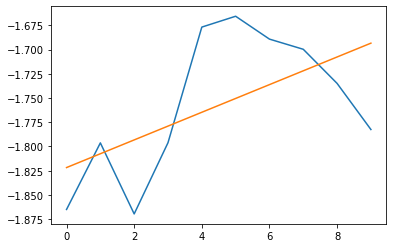

In [36]:
p = 10
dados_out , b = linear_model_order_p_1d(dados, p=p)
x = np.arange(0, p)
plt.plot(x,dados_out[:p])
plt.plot(x,x*b[1]+b[0])
plt.show()

# 3.10

## TODO: Erros adicionados e erros previstos num plot

## Duvidas [PDC]
#### E se o outlier for o valor de index  0? ou index menor que p?
#### distribuição do errro? como assim?
#### Para o plot, é suposto mostrar tudo ou só mostrar as partes que têm erros?
#### Como é suposto usar o LOO e GCV? Existe alternativas sem usar estes 2 algoritmos?

In [37]:
def faz_otrespontodez(data, p_valores, k_z):
    data_with_outliers = injeta_outliers(data=data, x_per=10, k=k_z, max_iter=10)
    _, find_outliers = z_score(data_with_outliers, k_z)
    erros = []
    for outlier in find_outliers.index:
        if outlier >= p_valores:
            # da serie, tirar o subarray a partir do outlier(index)
            train_array = data[outlier - p_valores : outlier] # aqui vou considerar os dados normais
            if len(train_array) == 10: # Nao percebo este erro
                test = data_with_outliers[outlier]

                # mandar esse subarray para a RL
                _, b = linear_model_order_p_1d(train_array, len(train_array))
                new_value = p_valores * b[1] + b[0]

                # comprar com o outlier i guess.. aka persomindo que e o "valor real"
                #print("ERRO ABSOLUTO - "+str(abs(new_value-data[outlier])))
                erros.append(abs(new_value-data[outlier]))
            
    return np.array(erros).mean() ** 2, np.array(erros)

In [38]:
mean_square, errors = faz_otrespontodez(transformed_data["Stand"]["ACC"], 10, 2)

print("Erro quadrado: " + str(mean_square))
print("Média do erro:", errors.mean())
print("Desvio padrao:", errors.std())

Erro quadrado: 0.0023292058756379545
Média do erro: 0.04826184699778858
Desvio padrao: 0.047020745608184256


# 3.11

## [PDC] Usar outras variáveis (aka Y e Z? ou é para usar os outros sensores?)
### Para já vou copiar o 3.10 e fazer a cena de p/2 para frente e para tras     

In [39]:
def faz_otrespontoonze(data,p_valores,k_z):
    data_with_outliers = injeta_outliers(data=data, x_per=10, k=k_z, max_iter=10)
    _,find_outliers = z_score(data_with_outliers, k_z)
    erros = []
    for outlier in find_outliers.index:
        if outlier >= p_valores:
            # da serie, tirar o subarray a partir do outlier(index)
            train_array = list(data[outlier-p_valores//2:outlier]) + list(data[outlier+1:outlier-p_valores//2+1])
            if len(train_array) != 0: # Nao percebo este erro
                test = data_with_outliers[outlier]

                # mandar esse subarray para a RL
                _,b = linear_model_order_p_1d(train_array,len(train_array))
                new_value = p_valores//2*b[1]+b[0]

                # comprar com o outlier i guess.. aka persomindo que e o "valor real"
                #print("ERRO ABSOLUTO - "+str(abs(new_value-data[outlier])))
                erros.append(abs(new_value-data[outlier]))
            
    return np.array(erros).mean() ** 2, np.array(erros)

In [40]:
mean_square, errors = faz_otrespontoonze(transformed_data["Stand"]["ACC"], 10, 2)

print("Erro quadrado: " + str(mean_square))
print("Média do erro:", errors.mean())
print("Desvio padrao:", errors.std())

Erro quadrado: 0.0019789070431172804
Média do erro: 0.044484908037639916
Desvio padrao: 0.03914490749525079
